#Análisis de Natalidad en México

In [ ]:
#Importar librerias a utilizar
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#from scipy.optimize import minimize
import os
import glob 
import pandas as pd
import re

In [ ]:
libro_0 = pd.ExcelFile('natalidad.xlsx')
print(libro_0.sheet_names)
data0 = libro_0.parse('datos')
print(data0)

['natalidad', 'datos']
    Periodo  Nacimientos
0      1994      2904389
1      1995      2750444
2      1996      2707718
3      1997      2698425
4      1998      2668428
5      1999      2769089
6      2000      2798339
7      2001      2767610
8      2002      2699084
9      2003      2655894
10     2004      2625056
11     2005      2567906
12     2006      2505939
13     2007      2655083
14     2008      2636110
15     2009      2577214
16     2010      2643908
17     2011      2586287
18     2012      2498880
19     2013      2478889
20     2014      2463420
21     2015      2353596
22     2016      2293708
23     2017      2234039
24     2018      2162535
25     2019      2092214


In [ ]:
year0 = np.unique(data0['Periodo'])
year0

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

In [ ]:
mp, ind = np.unique(data0['Nacimientos'], return_index=True)
mp=mp[np.argsort(ind)]
mp

array([2904389, 2750444, 2707718, 2698425, 2668428, 2769089, 2798339,
       2767610, 2699084, 2655894, 2625056, 2567906, 2505939, 2655083,
       2636110, 2577214, 2643908, 2586287, 2498880, 2478889, 2463420,
       2353596, 2293708, 2234039, 2162535, 2092214])

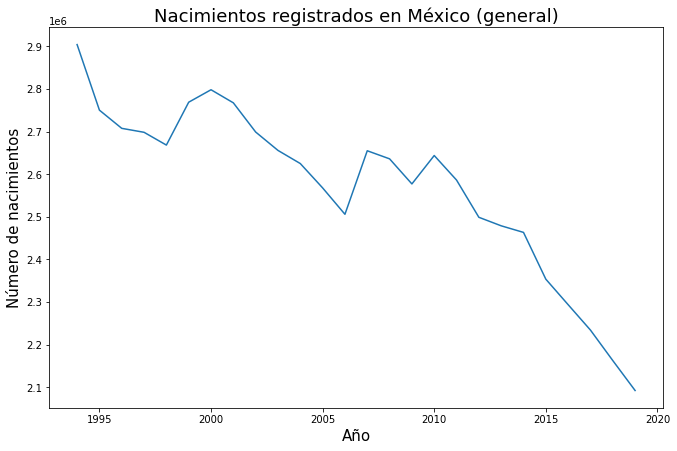

In [ ]:
plt.figure(figsize=(11,7))
plt.plot(year0, mp)

plt.title('Nacimientos registrados en México (general)', fontsize=18)
plt.ylabel('Número de nacimientos', fontsize=15)
plt.xlabel('Año', fontsize=15)
plt.show()

#Regresión lineal

In [ ]:
x = year0.reshape(-1,1)
y = mp

model = LinearRegression().fit(x, y)
y_pred = model.intercept_ + model.coef_ * x
m = model.coef_
b = model.intercept_
print('La ecuación que describe el comportamiento de natalidad es: %0.4fx %+0.4f'%(m,b))

La ecuación que describe el comportamiento de natalidad es: -23758.5477x +50240533.7908


In [ ]:
r_sq = model.score(x, y)
print('coeficiente de determinación:', round(r_sq,4))

coeficiente de determinación: 0.8062


In [ ]:
y_pred = model.intercept_ + model.coef_ * 2030
print('Número de nacimientos calculados para 2030:', y_pred)

Número de nacimientos calculados para 2030: [2010681.97538462]


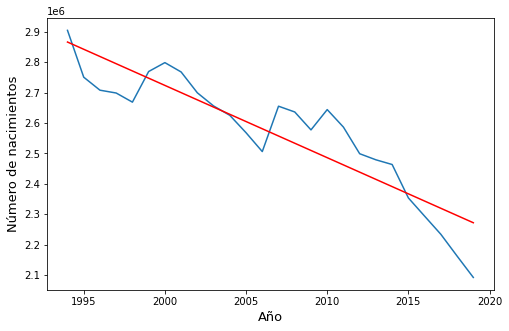

In [ ]:
plt.figure(figsize=(8,5))
plt.ylabel('Número de nacimientos', fontsize=13)
plt.xlabel('Año', fontsize=13)

plt.plot(x, y)
plt.plot(x, m*x + b,'-r')

# Nacimientos registrados en México

In [ ]:
libro = pd.ExcelFile('natalidad_1.xlsx')
print(libro.sheet_names)
data1 = libro.parse('datos')
print(data1)

['general', 'datos']
    Año  Aguascalientes  Baja California  ...  Yucatán  Zacatecas  Extranjero
0  2010           26583            63559  ...    37703      35974       7 362
1  2011           27427            65631  ...    36860      36629       8 921
2  2012           26933            62871  ...    36427      35625       8 911
3  2013           26434            61840  ...    38588      35089       9 303
4  2014           27080            63183  ...    37579      34031       9 096
5  2015           26486            63805  ...    37117      33833      10 776
6  2016           26388            62608  ...    35381      33677       7 856
7  2017           26955            61840  ...    35017      34460      10 842
8  2018           25938            60174  ...    35158      33098      14 843
9  2019           25011            56554  ...    33336      31437      12 734

[10 rows x 34 columns]


In [ ]:
year1 = np.unique(data1['Año'])
year1

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
ag, a = np.unique(data1['Aguascalientes'], return_index=True)
ag=ag[np.argsort(a)]
ag

array([26583, 27427, 26933, 26434, 27080, 26486, 26388, 26955, 25938,
       25011])

In [ ]:
bj, b = np.unique(data1['Baja California'], return_index=True)
bj=bj[np.argsort(b)]
bj

array([63559, 65631, 62871, 61840, 63183, 63805, 62608, 60174, 56554])

In [ ]:
bjs, c = np.unique(data1['Baja California Sur'], return_index=True)
bjs=bjs[np.argsort(c)]
bjs

array([13988, 13412, 12864, 12489, 12667, 12526, 12545, 12573, 11917,
       11761])

In [ ]:
cmp,d = np.unique(data1['Campeche'], return_index=True)
cmp=cmp[np.argsort(d)]
cmp

array([20380, 22138, 18343, 18998, 19304, 17862, 17361, 17034, 16247,
       14867])

In [ ]:
chui, e = np.unique(data1['Coahuila de Zaragoza'], return_index=True)
chui=chui[np.argsort(e)]
chui

array([56972, 58882, 59966, 62490, 62966, 62807, 62011, 58393, 56718,
       52912])

In [ ]:
col, f = np.unique(data1['Colima'], return_index=True)
col=col[np.argsort(f)]
col

array([13796, 14054, 13422, 13287, 13303, 12344, 11867, 11756, 11375,
       10805])

In [ ]:
chi, g = np.unique(data1['Chiapas'], return_index=True)
chi=chi[np.argsort(g)]
chi

array([175382, 168256, 144423, 164102, 164912, 145526, 140356, 131638,
       130200, 140265])

In [ ]:
chua,h = np.unique(data1['Chihuahua'], return_index=True)
chua=chua[np.argsort(h)]
chua

array([74063, 69376, 69735, 66516, 66110, 63395, 62313, 63475, 58617,
       59797])

In [ ]:
cdmx,i = np.unique(data1['Ciudad de México'], return_index=True)
cdmx=cdmx[np.argsort(i)]
cdmx

array([160057, 156549, 153631, 145302, 145609, 135828, 128227, 119227,
       111130, 103154])

In [ ]:
dur,j = np.unique(data1['Durango'], return_index=True)
dur=dur[np.argsort(j)]
dur

array([42514, 41922, 40269, 39298, 40337, 39738, 37801, 37897, 36157,
       32981])

In [ ]:
gto,k = np.unique(data1['Guanajuato'], return_index=True)
gto=gto[np.argsort(k)]
gto

array([126741, 124003, 122412, 119083, 114890, 114269, 117281, 116531,
       116207, 110755])

In [ ]:
gue,l = np.unique(data1['Guerrero'], return_index=True)
gue=gue[np.argsort(l)]
gue

array([119780, 113692,  98285, 102077,  90352,  80336,  87127,  79244,
        73750,  77125])

In [ ]:
hi,m = np.unique(data1['Hidalgo'], return_index=True)
hi=hi[np.argsort(m)]
hi

array([62185, 63380, 59924, 59045, 54108, 54124, 52629, 50255, 48096,
       44563])

In [ ]:
jal,n = np.unique(data1['Jalisco'], return_index=True)
jal=jal[np.argsort(n)]
jal

array([161543, 163123, 161217, 159748, 158592, 151578, 148377, 151950,
       146960, 139173])

In [ ]:
mex,o = np.unique(data1['México'], return_index=True)
mex=mex[np.argsort(o)]
mex

array([335898, 327165, 326412, 317834, 316088, 303778, 295635, 286204,
       271684, 253938])

In [ ]:
mich,p = np.unique(data1['Michoacán de Ocampo'], return_index=True)
mich=mich[np.argsort(p)]
mich

array([116260, 111362, 104885, 105158, 104370,  98543,  96217,  95287,
        91526,  91294])

In [ ]:
mor,q = np.unique(data1['Morelos'], return_index=True)
mor=mor[np.argsort(q)]
mor

array([40210, 40230, 37446, 37335, 36666, 37089, 35632, 33159, 30225,
       29727])

In [ ]:
nay,r = np.unique(data1['Nayarit'], return_index=True)
nay=nay[np.argsort(r)]
nay

array([24639, 24949, 25731, 24163, 22930, 23663, 21714, 21688, 20273,
       18266])

In [ ]:
nl,s = np.unique(data1['Nuevo León'], return_index=True)
nl=nl[np.argsort(s)]
nl

array([94119, 93747, 94440, 93710, 93225, 93123, 92978, 89115, 93886,
       90651])

In [ ]:
ox,t = np.unique(data1['Oaxaca'], return_index=True)
ox=ox[np.argsort(t)]
ox

array([109624,  98888,  95505,  92503,  88364,  85492,  83564,  78673,
        79436,  76323])

In [ ]:
pb,u = np.unique(data1['Puebla'], return_index=True)
pb=pb[np.argsort(u)]
pb

array([160571, 146865, 147296, 140507, 150633, 141121, 132823, 136271,
       127695, 124669])

In [ ]:
qrt,v = np.unique(data1['Querétaro'], return_index=True)
qrt=qrt[np.argsort(v)]
qrt

array([40863, 41714, 41567, 41817, 42231, 41904, 39634, 39400, 38559,
       37780])

In [ ]:
qroo,w = np.unique(data1['Quintana Roo'], return_index=True)
qroo=qroo[np.argsort(w)]
qroo

array([28999, 28848, 28736, 28103, 30563, 30841, 30367, 29442, 29306,
       30707])

In [ ]:
slp,x = np.unique(data1['San Luis Potosí'], return_index=True)
slp=slp[np.argsort(x)]
slp

array([58583, 57549, 55847, 54488, 54112, 52250, 49688, 48693, 47738,
       46706])

In [ ]:
sin,y = np.unique(data1['Sinaloa'], return_index=True)
sin=sin[np.argsort(y)]
sin

array([61233, 60208, 57543, 56267, 55371, 53461, 53247, 51850, 51523,
       49245])

In [ ]:
son,z = np.unique(data1['Sonora'], return_index=True)
son=son[np.argsort(z)]
son

array([54110, 54756, 53768, 52825, 51894, 48925, 46785, 45951, 43729,
       44229])

In [ ]:
tab,ab = np.unique(data1['Tabasco'], return_index=True)
tab=tab[np.argsort(ab)]
tab

array([49844, 49575, 48806, 52478, 52508, 49785, 50310, 48725, 43911,
       43759])

In [ ]:
tam,ac = np.unique(data1['Tamaulipas'], return_index=True)
tam=tam[np.argsort(ac)]
tam

array([69211, 66892, 63263, 59933, 62358, 60263, 58914, 57282, 56944,
       55423])

In [ ]:
tlx,ad = np.unique(data1['Tlaxcala'], return_index=True)
tlx=tlx[np.argsort(ad)]
tlx

array([27076, 27867, 28203, 27060, 25832, 26166, 25057, 26589, 24842,
       23779])

In [ ]:
vra,ae = np.unique(data1['Veracruz de Ignacio de la Llave'], return_index=True)
vra=vra[np.argsort(ae)]
vra

array([174086, 171417, 164174, 161019, 162156, 144842, 137338, 126623,
       124673, 118488])

In [ ]:
yuc,af = np.unique(data1['Yucatán'], return_index=True)
yuc=yuc[np.argsort(af)]
yuc

array([37703, 36860, 36427, 38588, 37579, 37117, 35381, 35017, 35158,
       33336])

In [ ]:
zct,ag = np.unique(data1['Zacatecas'], return_index=True)
zct=zct[np.argsort(ag)]
zct

array([35974, 36629, 35625, 35089, 34031, 33833, 33677, 34460, 33098,
       31437])

#*Graficando los datos*

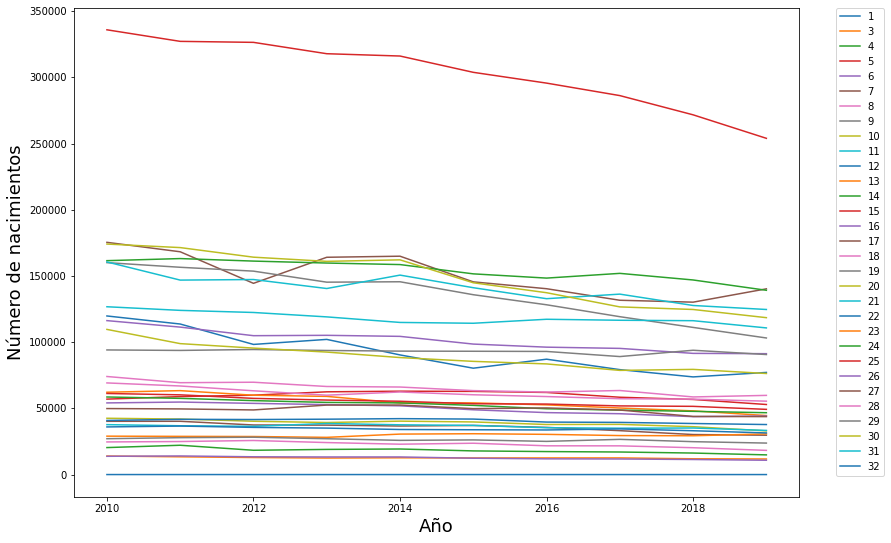

In [ ]:
plt.figure(figsize=(13,9))

plt.plot(year1, ag, label = '1')
#plt.plot(year1, bj, label = '2')
plt.plot(year1, bjs, label = '3')
plt.plot(year1, cmp, label = '4')
plt.plot(year1, chui, label = '5')
plt.plot(year1, col, label = '6')
plt.plot(year1, chi, label = '7')
plt.plot(year1, chua, label = '8')

plt.plot(year1, cdmx, label = '9')
plt.plot(year1, dur, label = '10')
plt.plot(year1, gto, label = '11')
plt.plot(year1, gue, label = '12')
plt.plot(year1, hi, label = '13')
plt.plot(year1, jal, label = '14')
plt.plot(year1, mex, label = '15')
plt.plot(year1, mich, label = '16')

plt.plot(year1, mor, label = '17')
plt.plot(year1, nay, label = '18')
plt.plot(year1, nl, label = '19')
plt.plot(year1, ox, label = '20')
plt.plot(year1, pb, label = '21')
plt.plot(year1, qrt, label = '22')
plt.plot(year1, qroo, label = '23')
plt.plot(year1, slp, label = '24')

plt.plot(year1, sin, label = '25')
plt.plot(year1, son, label = '26')
plt.plot(year1, tab, label = '27')
plt.plot(year1, tam, label = '28')
plt.plot(year1, tlx, label = '29')
plt.plot(year1, vra, label = '30')
plt.plot(year1, yuc, label = '31')
plt.plot(year1, zct, label = '32')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Nacimientos registrados en México (por estado)', fontsize=20)
plt.ylabel('Número de nacimientos', fontsize=15)
plt.xlabel('Año', fontsize=15)
plt.savefig('nacimientos.png')
plt.show()

#Prevalencia de uso de métodos anticonceptivos modernos en mujeres en edad fértil

In [68]:
libro4 = pd.ExcelFile('natalidad_5.xlsx')
print(libro4.sheet_names)
data4 = libro4.parse('datos')
print(data4)

['general', 'datos']
    Año  Estados Unidos Mexicanos  ...  Yucatán  Zacatecas
0  1992                      55.0  ...     44.9       48.5
1  1997                      59.4  ...     52.8       59.6
2  2009                      67.2  ...     61.1       64.5
3  2014                      68.3  ...     64.2       65.3
4  2018                      53.4  ...     49.8       50.0

[5 rows x 34 columns]


In [69]:
year4 = np.unique(data4['Año'])
year4

array([1992, 1997, 2009, 2014, 2018])

In [70]:
ag, a = np.unique(data4['Aguascalientes'], return_index=True)
ag=ag[np.argsort(a)]
ag

array([47.6, 51.3, 63.4, 66. , 48.3])

In [71]:
bj, b = np.unique(data4['Baja California'], return_index=True)
bj=bj[np.argsort(b)]
bj

array([65. , 68. , 75.3, 74.1, 58.6])

In [72]:
bjs, c = np.unique(data4['Baja California Sur'], return_index=True)
bjs=bjs[np.argsort(c)]
bjs

array([73.1, 73.6, 73.8, 59.8])

In [73]:
cmp,d = np.unique(data4['Campeche'], return_index=True)
cmp=cmp[np.argsort(d)]
cmp

array([54.8, 59.5, 67.8, 66.5, 52.9])

In [74]:
chui, e = np.unique(data4['Coahuila de Zaragoza'], return_index=True)
chui=chui[np.argsort(e)]
chui

array([68.9, 67.7, 71.5, 71.4, 58.2])

In [75]:
col, f = np.unique(data4['Colima'], return_index=True)
col=col[np.argsort(f)]
col

array([64.7, 66. , 71.6, 71.3, 54.9])

In [76]:
chi, g = np.unique(data4['Chiapas'], return_index=True)
chi=chi[np.argsort(g)]
chi

array([40.1, 47.6, 51.7, 55.6, 44.6])

In [77]:
chua,h = np.unique(data4['Chihuahua'], return_index=True)
chua=chua[np.argsort(h)]
chua

array([66.4, 69. , 74.3, 74. , 58.5])

In [78]:
cdmx,i = np.unique(data4['Ciudad de México'], return_index=True)
cdmx=cdmx[np.argsort(i)]
cdmx

array([68.6, 71.2, 74.8, 72.8, 55.5])

In [79]:
dur,j = np.unique(data4['Durango'], return_index=True)
dur=dur[np.argsort(j)]
dur

array([53.2, 60.8, 68.8, 71.1, 55. ])

In [80]:
gto,k = np.unique(data4['Guanajuato'], return_index=True)
gto=gto[np.argsort(k)]
gto

array([41.7, 42.2, 59.6, 61.8, 50.9])

In [81]:
gue,l = np.unique(data4['Guerrero'], return_index=True)
gue=gue[np.argsort(l)]
gue

array([40.3, 43.5, 57.8, 63.7, 49.8])

In [82]:
hi,m = np.unique(data4['Hidalgo'], return_index=True)
hi=hi[np.argsort(m)]
hi

array([51.2, 55.4, 65.2, 70.5, 58.2])

In [83]:
jal,n = np.unique(data4['Jalisco'], return_index=True)
jal=jal[np.argsort(n)]
jal

array([48.8, 53.4, 63.2, 64.4, 51.4])

In [84]:
mex,o = np.unique(data4['México'], return_index=True)
mex=mex[np.argsort(o)]
mex

array([64.1, 65.2, 71.3, 73.6, 56.2])

In [85]:
mich,p = np.unique(data4['Michoacán de Ocampo'], return_index=True)
mich=mich[np.argsort(p)]
mich

array([45.2, 50.7, 56.9, 62.5, 48.3])

In [86]:
mor,q = np.unique(data4['Morelos'], return_index=True)
mor=mor[np.argsort(q)]
mor

array([60.7, 65.6, 71.3, 71.1, 55.5])

In [87]:
nay,r = np.unique(data4['Nayarit'], return_index=True)
nay=nay[np.argsort(r)]
nay

array([66.7, 69.9, 75.2, 72.9, 56.9])

In [88]:
nl,s = np.unique(data4['Nuevo León'], return_index=True)
nl=nl[np.argsort(s)]
nl

array([66.5, 66.1, 73.2, 69.3, 53.3])

In [89]:
ox,t = np.unique(data4['Oaxaca'], return_index=True)
ox=ox[np.argsort(t)]
ox

array([33.6, 42.4, 59.6, 58.9, 46.4])

In [90]:
pb,u = np.unique(data4['Puebla'], return_index=True)
pb=pb[np.argsort(u)]
pb

array([40.1, 48.1, 63.4, 68.8, 48.9])

In [91]:
qrt,v = np.unique(data4['Querétaro'], return_index=True)
qrt=qrt[np.argsort(v)]
qrt

array([43.2, 52.1, 62.7, 67.9, 52.9])

In [92]:
qroo,w = np.unique(data4['Quintana Roo'], return_index=True)
qroo=qroo[np.argsort(w)]
qroo

array([56. , 58.5, 67.4, 67.6, 54.1])

In [93]:
slp,x = np.unique(data4['San Luis Potosí'], return_index=True)
slp=slp[np.argsort(x)]
slp

array([45.3, 52.6, 62.9, 68.2, 51.4])

In [94]:
sin,y = np.unique(data4['Sinaloa'], return_index=True)
sin=sin[np.argsort(y)]
sin

array([67.7, 73.3, 77.6, 76.2, 56.1])

In [95]:
son,z = np.unique(data4['Sonora'], return_index=True)
son=son[np.argsort(z)]
son

array([66.6, 70.3, 76.1, 73.4, 59.9])

In [96]:
tab,ab = np.unique(data4['Tabasco'], return_index=True)
tab=tab[np.argsort(ab)]
tab

array([55.5, 57.9, 63.4, 65.8, 52.1])

In [97]:
tam,ac = np.unique(data4['Tamaulipas'], return_index=True)
tam=tam[np.argsort(ac)]
tam

array([61.6, 64.2, 69.4, 71.1, 52.6])

In [98]:
tlx,ad = np.unique(data4['Tlaxcala'], return_index=True)
tlx=tlx[np.argsort(ad)]
tlx

array([47.4, 53.5, 60.7, 70. , 54.7])

In [99]:
vra,ae = np.unique(data4['Veracruz de Ignacio de la Llave'], return_index=True)
vra=vra[np.argsort(ae)]
vra

array([52.9, 61.2, 70.4, 66.1, 56.4])

In [100]:
yuc,af = np.unique(data4['Yucatán'], return_index=True)
yuc=yuc[np.argsort(af)]
yuc

array([44.9, 52.8, 61.1, 64.2, 49.8])

In [101]:
zct,ag = np.unique(data4['Zacatecas'], return_index=True)
zct=zct[np.argsort(ag)]
zct

array([48.5, 59.6, 64.5, 65.3, 50. ])

#Graficando

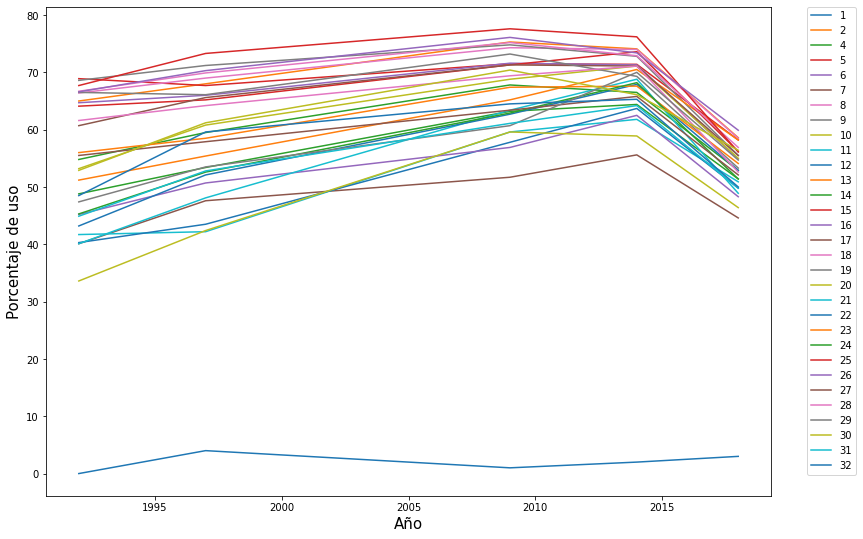

In [104]:
plt.figure(figsize=(13,9))

plt.plot(year4, ag, label = '1')
plt.plot(year4, bj, label = '2')
#plt.plot(year4, bjs, label = '3')
plt.plot(year4, cmp, label = '4')
plt.plot(year4, chui, label = '5')
plt.plot(year4, col, label = '6')
plt.plot(year4, chi, label = '7')
plt.plot(year4, chua, label = '8')

plt.plot(year4, cdmx, label = '9')
plt.plot(year4, dur, label = '10')
plt.plot(year4, gto, label = '11')
plt.plot(year4, gue, label = '12')
plt.plot(year4, hi, label = '13')
plt.plot(year4, jal, label = '14')
plt.plot(year4, mex, label = '15')
plt.plot(year4, mich, label = '16')

plt.plot(year4, mor, label = '17')
plt.plot(year4, nay, label = '18')
plt.plot(year4, nl, label = '19')
plt.plot(year4, ox, label = '20')
plt.plot(year4, pb, label = '21')
plt.plot(year4, qrt, label = '22')
plt.plot(year4, qroo, label = '23')
plt.plot(year4, slp, label = '24')

plt.plot(year4, sin, label = '25')
plt.plot(year4, son, label = '26')
plt.plot(year4, tab, label = '27')
plt.plot(year4, tam, label = '28')
plt.plot(year4, tlx, label = '29')
plt.plot(year4, vra, label = '30')
plt.plot(year4, yuc, label = '31')
plt.plot(year4, zct, label = '32')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.title('Prevalencia de uso de métodos anticonceptivos modernos en mujeres en edad fértil', fontsize=20)
plt.ylabel('Porcentaje de uso', fontsize=15)
plt.xlabel('Año', fontsize=15)
plt.show()